In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

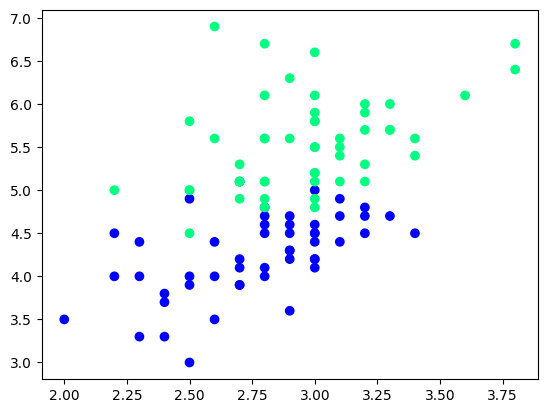

In [13]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [14]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
64,2.9,3.6,1
57,2.4,3.3,1
97,2.9,4.3,1
63,2.9,4.7,1
74,2.9,4.3,1
76,2.8,4.8,1
107,2.9,6.3,2
69,2.5,3.9,1
90,2.6,4.4,1
52,3.1,4.9,1


In [15]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [16]:
df_train

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
50,3.2,4.7,1
147,3.0,5.2,2
54,2.8,4.6,1
110,3.2,5.1,2
143,3.2,5.9,2
106,2.5,4.5,2
140,3.1,5.6,2
59,2.7,3.9,1
97,2.9,4.3,1


In [17]:
df_val

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
98,2.5,3.0,1
80,2.4,3.8,1
69,2.5,3.9,1
138,3.0,4.8,2


In [18]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [19]:
y_test

array([2, 1, 1, 1, 2])

# Case 1 - Bagging

In [20]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
110,3.2,5.1,2
143,3.2,5.9,2
59,2.7,3.9,1
93,2.3,3.3,1
54,2.8,4.6,1
93,2.3,3.3,1
97,2.9,4.3,1
106,2.5,4.5,2


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [22]:
dt_bag1 = DecisionTreeClassifier()

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

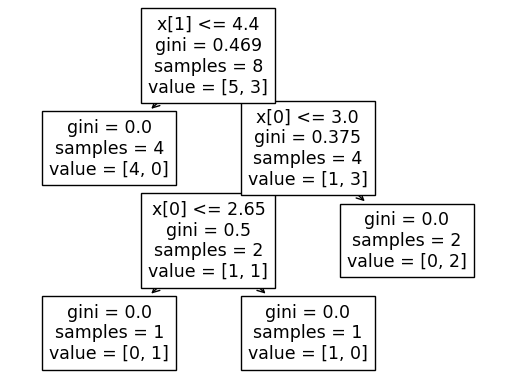

C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


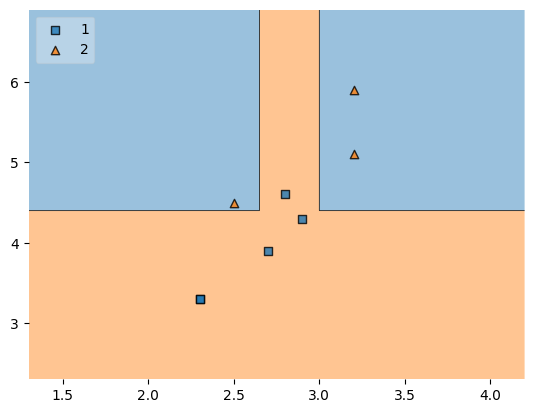

In [25]:
evaluate(dt_bag1,X,y)

In [26]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
110,3.2,5.1,2
54,2.8,4.6,1
143,3.2,5.9,2
93,2.3,3.3,1
147,3.0,5.2,2
110,3.2,5.1,2
110,3.2,5.1,2
97,2.9,4.3,1


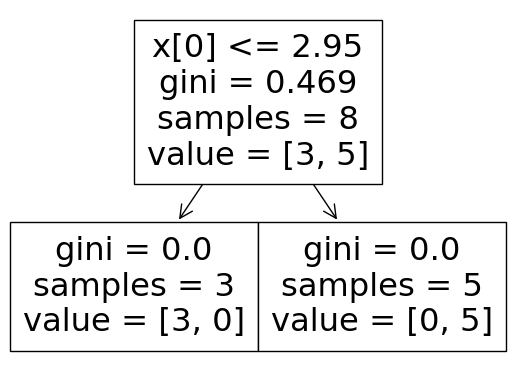

C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


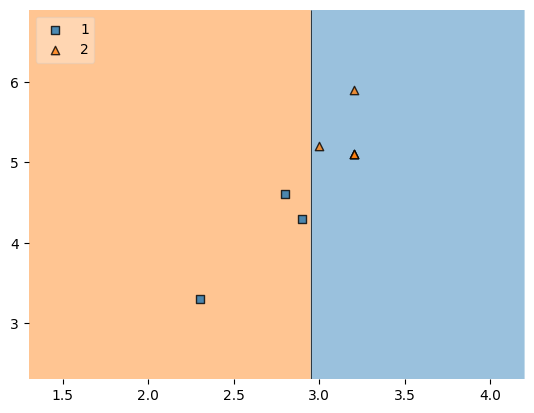

In [27]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [28]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
54,2.8,4.6,1
50,3.2,4.7,1
97,2.9,4.3,1
110,3.2,5.1,2
93,2.3,3.3,1
54,2.8,4.6,1
50,3.2,4.7,1
143,3.2,5.9,2


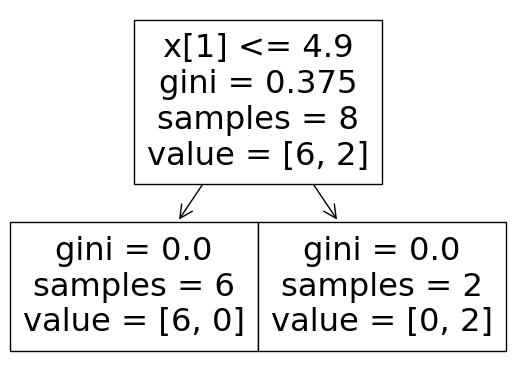

C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


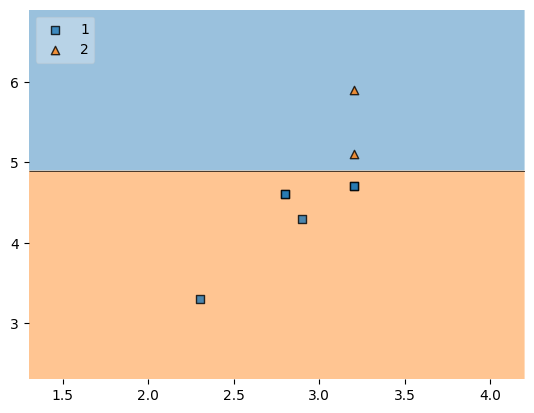

In [29]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [30]:
df_test

,SepalWidthCm,PetalLengthCm,Species
134,2.6,5.6,2
70,3.2,4.8,1
135,3.0,6.1,2
121,2.8,4.9,2
79,2.6,3.5,1


In [31]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [32]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
50,3.2,4.7,1
147,3.0,5.2,2
54,2.8,4.6,1
110,3.2,5.1,2
143,3.2,5.9,2
106,2.5,4.5,2
140,3.1,5.6,2
59,2.7,3.9,1
97,2.9,4.3,1


In [33]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
54,2.8,4.6,1
97,2.9,4.3,1
143,3.2,5.9,2
93,2.3,3.3,1
50,3.2,4.7,1
106,2.5,4.5,2
147,3.0,5.2,2
140,3.1,5.6,2


# Random Subspaces

In [35]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [36]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
108,109,6.7,2.5,5.8,1.8,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa


In [37]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,PetalWidthCm
108,6.7,1.8
42,4.4,0.2
85,6.0,1.6
96,5.7,1.3
48,5.3,0.2
14,5.8,0.2
37,4.9,0.1
149,5.9,1.8
62,6.0,1.0
38,4.4,0.2


# Random Patches

In [38]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
108,109,6.7,2.5,5.8,1.8,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa


In [39]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalLengthCm,PetalLengthCm
14,1.2,1.2
37,1.5,1.5
85,4.5,4.5
62,4.0,4.0
62,4.0,4.0
37,1.5,1.5
42,1.3,1.3
96,4.2,4.2
